Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.658974358974359
SVM Accuracy (with tuning): 0.6666666666666666
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        14
           1       0.72      0.68      0.70        19

    accuracy                           0.67        33
   macro avg       0.66      0.66      0.66        33
weighted avg       0.67      0.67      0.67        33

[[ 9  5]
 [ 6 13]]


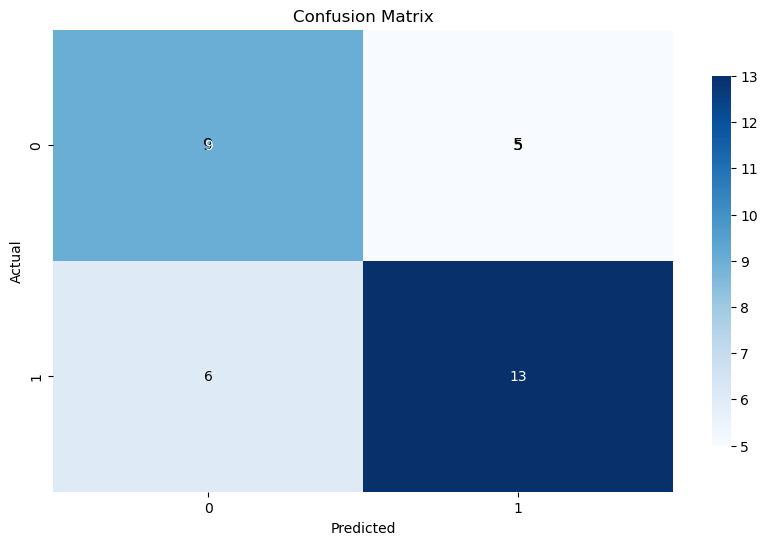

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Load the dataset
try:
    df = pd.read_excel('Gait_ML_featured_data.xlsx')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    sys.exit(1)
except Exception as e:
    print(f"An error occurred: {e}")
    sys.exit(1)

# Splitting the data
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Create a base model
svm = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Use the best parameters to fit the model
svm_best = SVC(**best_params)
svm_best.fit(X_train, Y_train)
y_pred = svm_best.predict(X_test)

# Evaluate the model
print(f"SVM Accuracy (with tuning): {accuracy_score(Y_test, y_pred)}")
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix')
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12, "color": "black"},
            cbar_kws={"shrink": 0.8})

# Annotate the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, cm[i, j], horizontalalignment='center', 
                 verticalalignment='center', color=color)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
